## Breast Cancer Analysis (Sklearn/Kaggle)

This notebook analyzes the Breast Cancer dataset using scikit-learn. The dataset file (`breast-cancer.csv`) was obtained from Kaggle.

- Please ensure dependencies from `requirements.txt` are installed before running.



### Dataset Provenance (Kaggle)

- Source: Kaggle — please replace the placeholder below with the exact link you used.
- Link: <ADD_KAGGLE_LINK_HERE>
- Local file: `breast-cancer.csv`

If you publish this repository, ensure you follow Kaggle's terms of use. Do not re-upload the raw data if the license prohibits it; instead, direct users to the official Kaggle page to download the dataset.


In [65]:
import numpy as np 
import pandas as pd 

In [66]:
df= pd.read_csv("breast-cancer.csv")
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
390,90317302,B,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722
521,91762702,M,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,...,29.92,26.93,205.70,2642.0,0.1342,0.4188,0.46580,0.24750,0.3157,0.09671
173,871641,B,11.080,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
120,865137,B,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211


In [67]:
df.drop(['id'], axis='columns', inplace=True)
df.shape


(569, 31)

In [68]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

diagnosis: object
radius_mean: float64
texture_mean: float64
perimeter_mean: float64
area_mean: float64
smoothness_mean: float64
compactness_mean: float64
concavity_mean: float64
concave points_mean: float64
symmetry_mean: float64
fractal_dimension_mean: float64
radius_se: float64
texture_se: float64
perimeter_se: float64
area_se: float64
smoothness_se: float64
compactness_se: float64
concavity_se: float64
concave points_se: float64
symmetry_se: float64
fractal_dimension_se: float64
radius_worst: float64
texture_worst: float64
perimeter_worst: float64
area_worst: float64
smoothness_worst: float64
compactness_worst: float64
concavity_worst: float64
concave points_worst: float64
symmetry_worst: float64
fractal_dimension_worst: float64


In [69]:
df['diagnosis_ismalignant'] = df['diagnosis'].map({'M':1, 'B':0 })

In [70]:
df.drop(['diagnosis'], axis='columns', inplace=True)
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_ismalignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [71]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_ismalignant      0
dtype: int64

In [72]:
df.duplicated().sum()

0

In [73]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [74]:
df.describe().loc[["min", "max"]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_ismalignant
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504,0.0
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,...,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750,1.0


In [75]:
X= df.drop(["diagnosis_ismalignant"], axis='columns' )
y= df['diagnosis_ismalignant']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Using Logistic Regression

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
]).fit(X_train, y_train)

In [78]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_proba)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



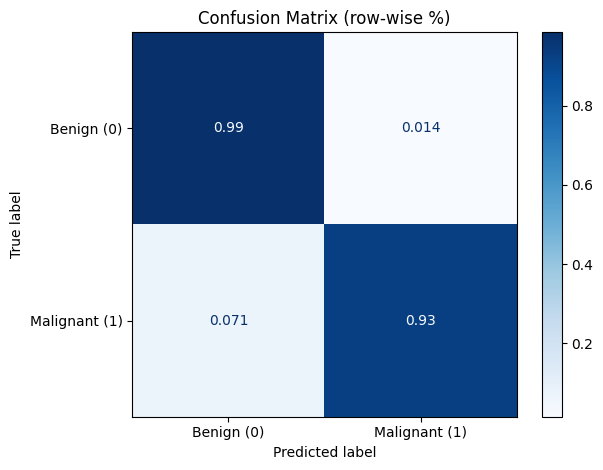

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=['Benign (0)', 'Malignant (1)'], cmap='Blues', normalize='true')

plt.title('Confusion Matrix (row-wise %)')
plt.tight_layout()
plt.show()